<a href="https://colab.research.google.com/github/Titovii/netology_dz/blob/main/final_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Задание 1

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Задание 2

In [4]:
df_number = df[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']]
df_categ = df[['Work_accident', 'left','promotion_last_5years','department']]

In [5]:
df_number.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [6]:
df_number.median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [7]:
df_number.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


2 моды, получается по average_montly_hours

In [8]:
df_categ.mode()

,Work_accident,left,promotion_last_5years,department
0,0,0,0,sales


In [9]:
df_categ.median()

<ipython-input-9-4912ef3004c6>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_categ.median()


Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
dtype: float64

медиана неинформативна

Задание 3

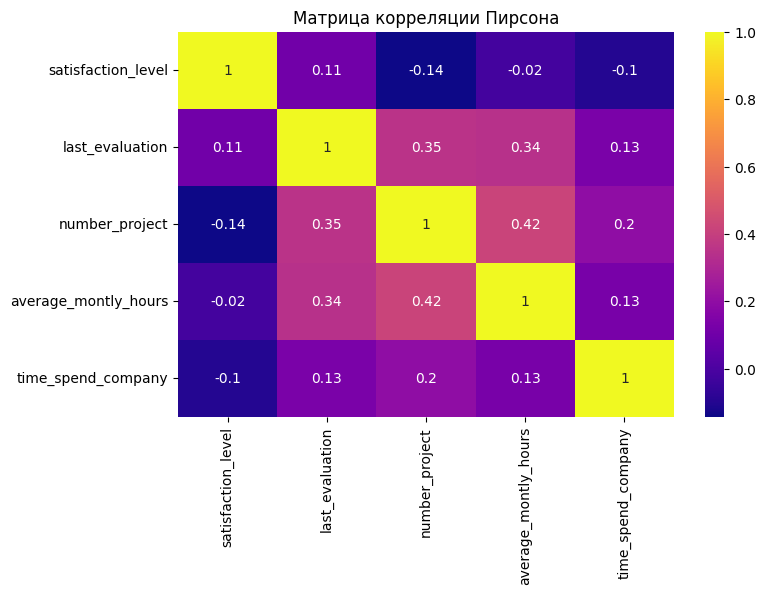

In [10]:
plt.figure(figsize=[8,5])
sns.heatmap(df_number.corr(), annot=True, cmap='plasma')
plt.title("Матрица корреляции Пирсона")
plt.show()

Наиболее скоррелированы - количество проектов и среднее число рабочих часов в месяц
Наименее - уровень удовлетворенности работой и среднее число рабочих часов в месяц

Задание 4

In [11]:
df[['department','left']].where(df['left']==0).groupby('department').count()

,left
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


Задание 5

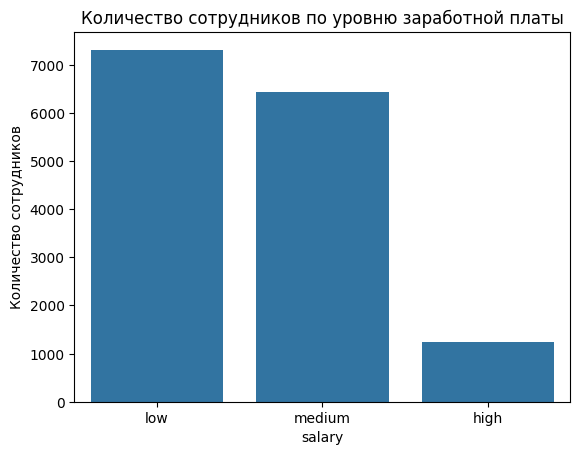

In [12]:
sns.countplot(data=df, x="salary")
plt.title("Количество сотрудников по уровню заработной платы")
plt.ylabel("Количество сотрудников")
plt.rcParams["figure.figsize"] = (10,4)
plt.show()

Задание 6

In [13]:
dfv = df[['salary','department']].groupby(['department','salary']).agg(counts=('salary', 'count'))

<Axes: xlabel='department', ylabel='counts'>

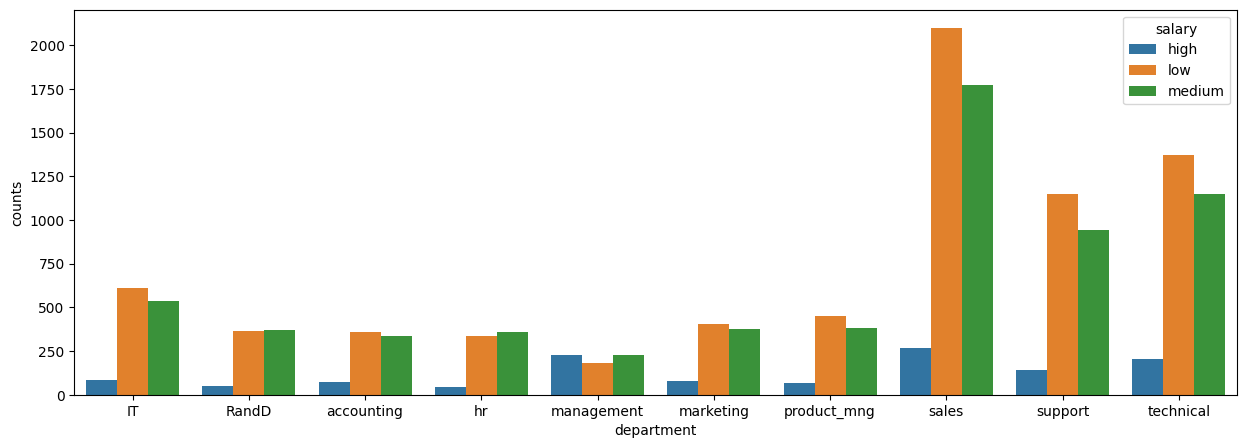

In [14]:
plt.figure(figsize=[15,5])
sns.barplot(x='department',
            y='counts',
            hue = 'salary',
            data = dfv)


Задание 7

Сформировать выборки сотрудников с низкой и высокой зп

In [15]:
low_salary = df.where(df['salary']=='low')
high_salary = df.where(df['salary']=='high')

Проверить, нормально ли распределены значения среднего числа часов на работе за месяц в выборках

In [16]:
def is_it_norm(sample, signif):
  stat, p = st.shapiro(sample)
  if p<signif:
    print(f"Данные имеют распределение, отличное от нормального, т.к. p_value = {p}, что меньше уровня значимости signif = {signif}")
  else: print("Данные распределены нормально")

In [17]:
is_it_norm(low_salary['average_montly_hours'], 0.05)

Данные распределены нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
is_it_norm(high_salary['average_montly_hours'], 0.05)

Данные распределены нормально


Проверим равенство дисперсий

In [19]:
def f_test(x, y):
  f = np.var(x, ddof=1)/np.var(y, ddof=1)
  dfn = x.size-1
  dfd = y.size-1
  p = 1-st.f.cdf(f, dfn, dfd)
  if p<0.05:
    print("Дисперсии одинаковые")
  else: print("Дисперсии различаются")

In [20]:
f_test(low_salary['average_montly_hours'], high_salary['average_montly_hours'])

Дисперсии одинаковые


Значит, проводя t-тест можно не учитывать поправку Уэлча. Сформулируем гипотезы.
Н0 - сотрудники с высоким окладом проводят на работе СТОЛЬКО ЖЕ времени, чем сотрудники с низком окладом
Н1 - сотрудники с высоким окладом проводят на работе БОЛЬШЕ ИЛИ МЕНЬШЕ времени, чем сотрудники с низком окладом

In [21]:
statist, p = st.ttest_ind(low_salary['average_montly_hours'], high_salary['average_montly_hours'])

if p > 0.05:
    print('Нулевая гипотеза верна, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Отклоняем нулевую гипотезу, средние, вероятно, различаются


Посчитаем средние, чтобы узнать в какую сторону различаются значения.

In [22]:
low_salary['average_montly_hours'].mean()

200.9965828321487

In [23]:
high_salary['average_montly_hours'].mean()

199.86742118027485

Таким образом, гипотеза из задания НЕВЕРНА.

Задание 8

In [24]:
lefted = df.where(df['left']==1)
working = df.where(df['left']==0)

In [25]:
lp = (lefted.where(lefted['promotion_last_5years']==1)['promotion_last_5years'].count()/lefted['promotion_last_5years'].count())*100
wp = (working.where(working['promotion_last_5years']==1)['promotion_last_5years'].count()/working['promotion_last_5years'].count())*100

print(f'Среди ушедших сотрудников за посление 5 лет были повышены: {round(lp, 2)}%,\n а среди работающих на текущий момент - {round(wp,2)}%.')

Среди ушедших сотрудников за посление 5 лет были повышены: 0.53%,
 а среди работающих на текущий момент - 2.63%.


In [26]:
ls = lefted['satisfaction_level'].mean()
ws = working['satisfaction_level'].mean()
print(f'Среди ушедших сотрудников средняя степень удовлетворенности работой: {round(ls, 2)},\n а среди работающих на текущий момент - {round(ws,2)}.')

Среди ушедших сотрудников средняя степень удовлетворенности работой: 0.44,
 а среди работающих на текущий момент - 0.67.


In [27]:
lj = lefted['number_project'].median()
wj = working['number_project'].median()
print(f'Среди ушедших сотрудников среднее число выполненных проектов {lj},\n а среди работающих на текущий момент - {wj}.')

Среди ушедших сотрудников среднее число выполненных проектов 4.0,
 а среди работающих на текущий момент - 4.0.


Задание 9

Разделить на обучабщую и тестовую выборки.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(df[['satisfaction_level',
                                                       'last_evaluation',
                                                       'number_project',
                                                       'average_montly_hours',
                                                       'time_spend_company',
                                                       'Work_accident',
                                                       'promotion_last_5years']],
                                                    df['left'],
                                                    test_size = 0.30,
                                                    random_state = 12)

In [77]:
x_train.shape

(10499, 7)

In [78]:
y_train.shape

(10499,)

In [79]:
x_test.shape

(4500, 7)

In [80]:
y_test.shape

(4500,)

Экземпляр класса линейной модели и ее обучение

In [101]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Коэффициент при X

In [102]:
a = model.coef_
a

array([-6.60367773e-01,  1.06477218e-01, -3.14965789e-02,  6.02932076e-04,
        3.34944281e-02, -1.45622228e-01, -1.62001235e-01])

In [103]:
b = model.intercept_
b

0.4700630749604497

Предскажем с помощью модели некоторые значения

In [104]:
y_pred = model.predict(x_test)
y_pred

array([ 0.4281364 ,  0.35503518,  0.2696097 , ...,  0.49062931,
        0.40260107, -0.0653164 ])

Подготовим данные к интерпретации. Т.к. человек может быть либо уволен (left=1), либо нет (left=0). Округлим значения до 0 и 1. 0 - это то, что округляется в меньшую сторону и то, что меньше или равно нуля, 1 - все остальное.

In [109]:
y_pred = pd.DataFrame(y_pred)

In [110]:
def convert(val):
  if val<=0:
    return 0
  else:
    return round(val)

In [111]:
y_pred = y_pred[0].apply(convert)

Оценим качество модели, сравнив предсказанные значения с ожидаемыми.

In [112]:
y_test = pd.DataFrame(y_test).reset_index(drop=True)

In [113]:
result = pd.DataFrame()
result['val'] = abs(y_pred[0] - y_test['left'])

In [114]:
succ = round(result.sum()[0]/result.count()[0],4)*100
print(f'Модель верно предсказала увольнение сотрудников на {succ}% тестовой выборки.')

Модель верно предсказала увольнение сотрудников на 24.51% тестовой выборки.
